#### Tips of using this notebook:

- Try to solve the problem yourself first with the help of ChatGPT.
- Then check the reference code and the example prompt. The example prompt will be given in the slides.
- Always check the reliability of the generated answers and be responsible for them.

# Exercise 1: Drawing graphs

Use proper prompt to ask ChatGPT to help drawing the graph using the packages networkx and matplotlib.
Requirements:
- Add all nodes correctly.
- Add edges with their weights and label the weights correctly.
- Specify the style (color, font, etc.) and positions of nodes.
- Understand each used function (such as the attributes it takes, the output it returns and so on) with the help of ChatGPT.
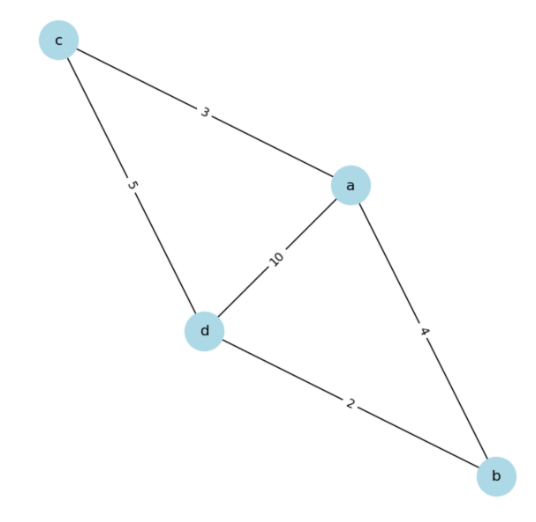

Your answer here (the prompt and the code):

Reference code (Check the sildes for example prompt):

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Define the list of nodes
nodes = ['a', 'b', 'c', 'd']

# Add nodes to the graph with fixed positions
fixed_positions = {'a': [2, 2], 'b': [3, 0], 'c': [0, 3], 'd': [1, 1]}
for node, pos in fixed_positions.items():
    G.add_node(node, pos=pos)

# Define the list of edges with their weights
edges = [('a', 'b', 4), ('a', 'c', 3), ('a', 'd', 10), ('b', 'd', 2), ('c', 'd', 5)]

# Add edges to the graph with weights
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# Draw the graph
plt.figure(figsize=(6, 6))
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=12)

# Label the weights on the edges
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)

# Show the graph
plt.axis('off')
plt.show()

# Exercise 2: BFS and DFS

Use proper prompt to ask ChatGPT to do the following tasks.


Tasks:
- Draw the path graph.
- Do breadth-first-search starting at the node 4.
- Do depth-first-search starting at the node 4.
- Understand the code with the help of ChatGPT.

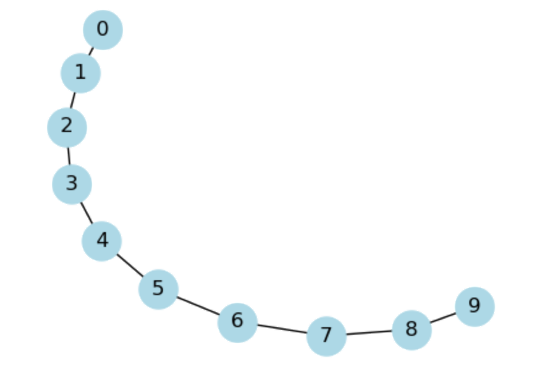

Your answer here (the prompt and the code):

Reference code (Check the sildes for example prompt):

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to perform breadth-first search
def bfs(graph, start):
    visited = set()  # Set to keep track of visited nodes
    queue = [start]  # Queue to store nodes to be visited

    while queue:
        node = queue.pop(0)
        if node not in visited:
            print(node, end=' ')
            visited.add(node)
            queue.extend(graph[node])

# Function to perform depth-first search
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()  # Set to keep track of visited nodes

    visited.add(start)
    print(start, end=' ')

    for neighbor in graph[start]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited)

# Creating a path graph with 10 nodes
graph = nx.path_graph(10)

# Drawing the graph
pos = nx.spring_layout(graph)  # Layout algorithm for positioning the nodes
nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=500)
plt.title('Path Graph')
plt.show()

# Performing BFS and printing the order of visited nodes
print('BFS Order:', end=' ')
bfs_order = bfs(graph, 4)
print()

# Performing DFS and printing the order of visited nodes
print('DFS Order:', end=' ')
dfs_order = dfs(graph, 4)


# Exercise 3: 4-queens’ problem

4 – Queens’ problem is to place 4 queens on a 4 x 4 chessboard in such a manner that no queens attack each other by being in the same row, column, or diagonal.
Requirements:
- Use DFS to solve this problem.
- Draw the chessboard of each step in the searching.
- Understand the code with the help of ChatGPT.

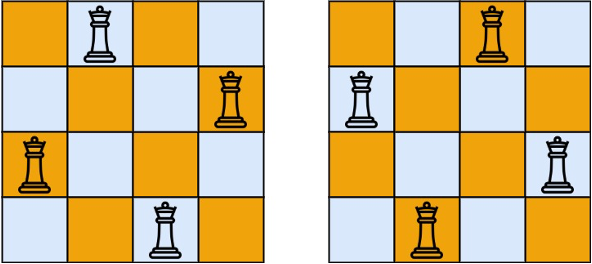


Your answer here (the prompt and the code):

Reference code (Check the sildes for example prompt):

In [ ]:
def is_valid(board, row, col):
    # Check if there is any queen in the same row
    for i in range(col):
        if board[row][i] == 'Q':
            return False

    # Check upper diagonal on left side
    i = row
    j = col
    while i >= 0 and j >= 0:
        if board[i][j] == 'Q':
            return False
        i -= 1
        j -= 1

    # Check lower diagonal on left side
    i = row
    j = col
    while i < 4 and j >= 0:
        if board[i][j] == 'Q':
            return False
        i += 1
        j -= 1

    return True


def solve(board, col):
    if col >= 4:
        return True

    for i in range(4):
        if is_valid(board, i, col):
            board[i][col] = 'Q'
            print_board(board)

            if solve(board, col + 1):
                return True

            board[i][col] = '-'  # Backtrack

    return False


def print_board(board):
    for row in board:
        print(' '.join(row))
    print()


board = [['-' for _ in range(4)] for _ in range(4)]
solve(board, 0)

# Exercise 4: Shortest Path


Formulate the real-world problem to a shortest path problem and solve it. 


You have just purchased a new car for $20,000. The cost of maintaining this car during a year depends on its age from the year you purchased it: 

| **Age of car (years)**          | **0** | **1** | **2** | **3** | **4** |
| ------------------------------- | ----- | ----- | ----- | ----- | ----- |
| **Annual maintenance cost ($)** | 1000  | 2000  | 3000  | 6000  | 10000 |


To avoid the high maintenance costs associated with an older car, you may trade in your car and purchase a new car. The price you receive on a trade-in depends on the age of the car at the time of the trade-in: 


| **Age of car (years)** | **1** | **2** | **3** | **4** | **5** |
| ---------------------- | ----- | ----- | ----- | ----- | ----- |
| **Trade-in price ($)** | 15000 | 12000 | 9000  | 5000  | 2000  |


Your answer here (the prompt and the code):

Reference code (Check the sildes for example prompt):

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the graph object
G = nx.Graph()

# Add nodes representing the years
years = [0, 1, 2, 3, 4, 5]
G.add_nodes_from(years)

# Add edges representing the net cost
G.add_edge(0, 1, net_cost=6000)
G.add_edge(0, 2, net_cost=11000)
G.add_edge(0, 3, net_cost=17000)
G.add_edge(0, 4, net_cost=27000)
G.add_edge(0, 5, net_cost=40000)
G.add_edge(1, 2, net_cost=6000)
G.add_edge(1, 3, net_cost=11000)
G.add_edge(1, 4, net_cost=17000)
G.add_edge(1, 5, net_cost=27000)
G.add_edge(2, 3, net_cost=6000)
G.add_edge(2, 4, net_cost=11000)
G.add_edge(2, 5, net_cost=17000)
G.add_edge(3, 4, net_cost=6000)
G.add_edge(3, 5, net_cost=11000)
G.add_edge(4, 5, net_cost=6000)

# Draw the graph
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

# Find the shortest path and calculate the total cost
shortest_path = nx.shortest_path(G, source=0, target=5, weight='net_cost')
total_cost = nx.shortest_path_length(G, source=0, target=5, weight='net_cost')

print("Shortest path from node 0 to node 5:", shortest_path)
print("Total cost from node 0 to node 5:", total_cost)# Exercise 3: 4-queens’ problemReference code (Check the sildes for example prompt):